<a href="https://colab.research.google.com/github/antons4971/ml_itc/blob/main/raw_house_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('data.csv')

## Basic Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(6), int64(4), object(6)
memory 

We can see above two columns returning null values by pandas. However, Dtype object below suggests further improper entries as 'object' is the most general python class, meaning these columns include some combination of specific types, which is undesirable. Bathrooms, sqrt_ft and garage should be numeric, these will need fixing. Visual inspection shows the frequent presence of 'None' entered as a string.

In [ ]:
for column in df:
    print(column, df[column].isin(['None']).any(), df[column].dtype)
    """for entry in df[column]:
        print(type(entry), entry)"""

MLS False int64
sold_price False float64
zipcode False int64
longitude False float64
latitude False float64
lot_acres False float64
taxes False float64
year_built False int64
bedrooms False int64
bathrooms True object
sqrt_ft True object
garage True object
kitchen_features True object
fireplaces False float64
floor_covering True object
HOA True object


In [ ]:
for column in df:
    if df[column].dtype == 'object':
        series = df[column].value_counts()
        print(series.info())

<class 'pandas.core.series.Series'>
Index: 20 entries, 3 to 36
Series name: bathrooms
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes
None
<class 'pandas.core.series.Series'>
Index: 2362 entries, None to 1772
Series name: sqrt_ft
Non-Null Count  Dtype
--------------  -----
2362 non-null   int64
dtypes: int64(1)
memory usage: 36.9+ KB
None
<class 'pandas.core.series.Series'>
Index: 22 entries, 3 to 13
Series name: garage
Non-Null Count  Dtype
--------------  -----
22 non-null     int64
dtypes: int64(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.series.Series'>
Index: 1872 entries, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven to Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless
Series name: kitchen_features
Non-Null Count  Dtype
--------------  -----
1872 non-null   int64
dtypes: int64(1)
memory usage: 29.2+ KB
None
<class 'pandas.core.series.Series'>
Index: 311 entries, Carpet, Cer

## Sold Price

<AxesSubplot:xlabel='sold_price'>

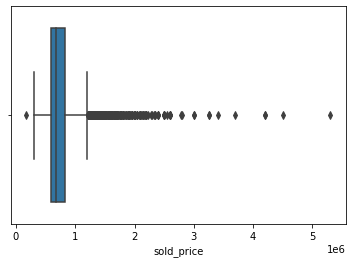

In [ ]:
sns.boxplot(x=df['sold_price'])

As expected

## Location

<AxesSubplot:xlabel='zipcode'>

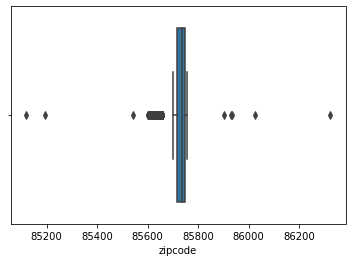

In [ ]:
sns.boxplot(x=df['zipcode'])

<AxesSubplot:xlabel='latitude'>

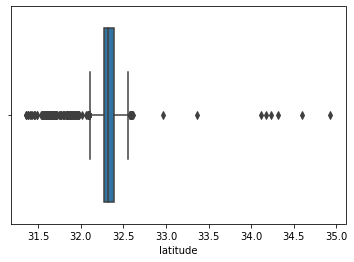

In [ ]:
sns.boxplot(x=df['latitude'])

<AxesSubplot:xlabel='longitude'>

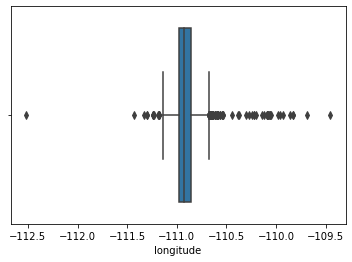

In [ ]:
sns.boxplot(x=df['longitude'])

None of the above are unreasonable, proximity of values does not suggest entry error.

## Lot Acres

This could probably be effectively predicted by a simple regression using inputs such as tax, sold_price, number of bedrooms and bathrooms etc. But as we are only missing ten values, this would not be worthwhile.

<AxesSubplot:xlabel='lot_acres'>

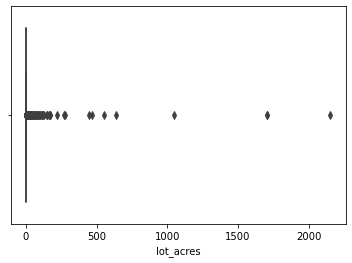

In [ ]:
sns.boxplot(x=df['lot_acres'])

Under a skewed distribution, average imputation could be highly distortive, the rows were dropped instead. Working on later columns, I determined that these dropped rows also contain errors in other columns, even more strongly justifying the decision.

In [ ]:
df = df.drop(df[df['lot_acres'].isnull()].index.tolist())

In [ ]:
len(df)

4990

## Taxes

<AxesSubplot:xlabel='taxes'>

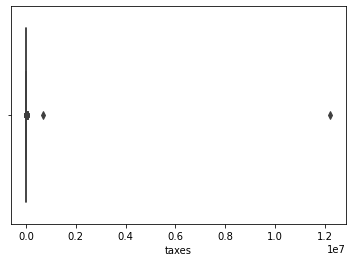

In [ ]:
sns.boxplot(x=df['taxes'])

One clear error, due to heavy-tailed distribution, this entry will be removed.

In [ ]:
df = df.drop(df[df['taxes'] > 10000000].index)

In [ ]:
len(df)

4989

<AxesSubplot:xlabel='taxes'>

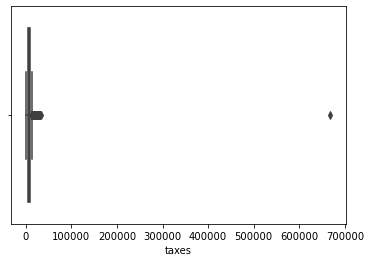

In [ ]:
sns.boxplot(x=df['taxes'])

An additional value strongly appears to be an error.

In [ ]:
df = df.drop(df[df['taxes'] > 600000].index)


In [ ]:
len(df)

4988

<AxesSubplot:xlabel='taxes'>

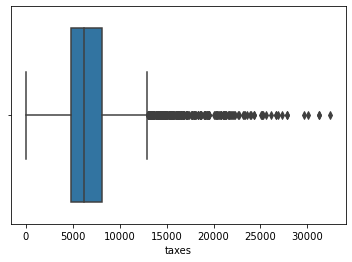

In [ ]:
sns.boxplot(x=df['taxes'])

This looks reasonable

## Year Built

<AxesSubplot:xlabel='year_built'>

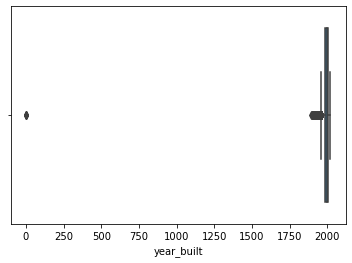

In [ ]:
sns.boxplot(x=df['year_built'])

'0' value clearly an error, mean imputation is reasonable due to fairly uniform distribution of values and small number of errors.

In [ ]:
df[df['year_built'] == 0]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
35,21307177,2495000.0,85637,-110.740635,31.720431,131.00,1220.32,0,13,15,13000,0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",4.0,"Carpet, Ceramic Tile, Mexican Tile",0
162,21207587,1210520.0,85658,-111.101588,32.468488,0.33,1412.75,0,4,5,3334,2,"Dishwasher, Refrigerator, Microwave, Oven",3.0,"Carpet, Natural Stone, Wood",550
946,21608590,695000.0,85645,-111.183593,31.702330,72.00,2480.58,0,4,4,2272,2,"Dishwasher, Refrigerator, Oven",2.0,Ceramic Tile,0
1438,21702126,877170.0,85755,-110.977158,32.459429,0.60,2005.57,0,3,4,3078,3,"Dishwasher, Garbage Disposal, Microwave, Oven",0.0,Other,167
1767,21719857,700000.0,85701,-110.963672,32.216996,0.13,7059.56,0,3,3,2500,3,"Dishwasher, Electric Range, Garbage Disposal, ...",0.0,Other: Recycled Porcelain,74


In [ ]:
df['year_built'].loc[df['year_built'] != 0].mean()

1994.3144691952639

In [ ]:
df['year_built'] = df['year_built'].replace(0,1994)

<AxesSubplot:xlabel='year_built'>

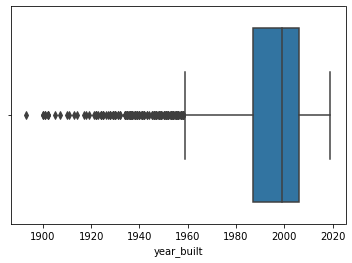

In [ ]:
sns.boxplot(x=df['year_built'])

## Bedrooms

In [ ]:
df['bedrooms'].value_counts()

4     2384
3     1399
5      869
2      163
6      114
7       32
8        8
1        4
9        3
10       3
36       3
13       2
11       2
19       1
18       1
Name: bedrooms, dtype: int64

Appears reasonable, very likely including commercial properties

## Bathrooms

In [ ]:
df['bathrooms'] = df['bathrooms'].replace('None', 0) #is this acceptable?

In [ ]:
df['bathrooms'] = df['bathrooms'].astype('float')

In [ ]:
df['bathrooms'] = df['bathrooms'].apply(np.floor)

In [ ]:
df['bathrooms'] = df['bathrooms'].astype('int')

In [ ]:
df['bathrooms'].value_counts()

3     1997
4     1835
5      654
6      207
2      191
7       58
8       19
9        8
0        6
1        3
35       3
11       2
10       1
15       1
14       1
18       1
36       1
Name: bathrooms, dtype: int64

In [ ]:
len(df[df['bathrooms']>df['bedrooms']])

1205

Presumably alot of non-residential buildings based on below.

In [ ]:
df[df['bathrooms']>df['bedrooms']+4]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4663,21832887,575359.5,85641,-110.687945,32.081978,1.07,625.0,2019,5,36,3720,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None


## Square Route of Square Feet

In [ ]:
len(df[df['sqrt_ft']=='None'])

46

In [ ]:
df['sqrt_ft'].value_counts()

3541    50
None    46
3052    25
3420    18
3811    16
        ..
4362     1
5586     1
5117     1
3793     1
1772     1
Name: sqrt_ft, Length: 2361, dtype: int64

In [ ]:
mean = df['sqrt_ft'][df['sqrt_ft']!='None'].astype('float').mean()

In [ ]:
df['sqrt_ft'] = df['sqrt_ft'].replace('None', mean)

In [ ]:
df['sqrt_ft'] = df['sqrt_ft'].astype('float')

<AxesSubplot:xlabel='sqrt_ft'>

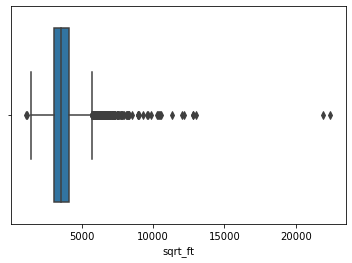

In [ ]:
sns.boxplot(x=df['sqrt_ft'])

In [ ]:
df = df.drop(df[df['sqrt_ft'] > 15000].index)

In [ ]:
#df = df.drop(['sqrt_ft'], axis = 1)

<AxesSubplot:xlabel='sqrt_ft'>

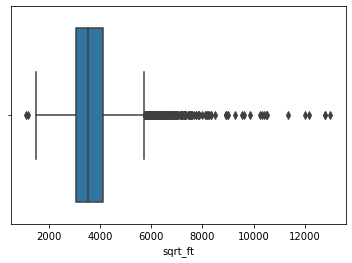

In [ ]:
sns.boxplot(x=df['sqrt_ft'])

## Garage

Unclear what garage entries mean, if number of garages, use full code below. This seems unusual though as the modal number is three, and few properties have three garages.

In [ ]:
df['garage'] = df['garage'].replace('None', 0) #is this acceptable?

In [ ]:
df['garage'] = df['garage'].astype('float')

In [ ]:
df['garage'] = df['garage'].apply(np.floor)

In [ ]:
df['garage'] = df['garage'].astype('int')

<AxesSubplot:xlabel='garage', ylabel='Count'>

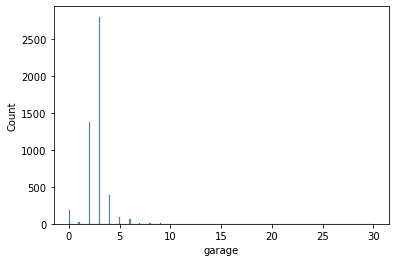

In [ ]:
sns.histplot(x=df['garage'])

## Fireplaces

<AxesSubplot:xlabel='fireplaces', ylabel='Count'>

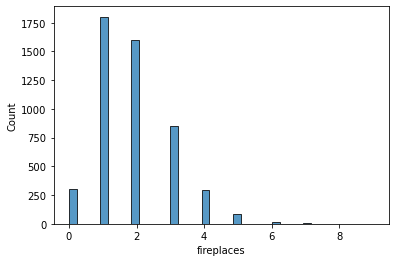

In [ ]:
sns.histplot(x=df['fireplaces'])

Probably safe to assume none means zero.

In [ ]:
df['fireplaces'] = df['fireplaces'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4986 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4986 non-null   int64  
 1   sold_price        4986 non-null   float64
 2   zipcode           4986 non-null   int64  
 3   longitude         4986 non-null   float64
 4   latitude          4986 non-null   float64
 5   lot_acres         4986 non-null   float64
 6   taxes             4986 non-null   float64
 7   year_built        4986 non-null   int64  
 8   bedrooms          4986 non-null   int64  
 9   bathrooms         4986 non-null   int32  
 10  sqrt_ft           4986 non-null   float64
 11  garage            4986 non-null   int32  
 12  kitchen_features  4986 non-null   object 
 13  fireplaces        4986 non-null   float64
 14  floor_covering    4986 non-null   object 
 15  HOA               4986 non-null   object 
dtypes: float64(7), int32(2), int64(4), object(

## HOA

This column has been dropped, its reference is non-numeric (which homeowner association), but there are far too many for one-hot encoding.

In [ ]:
df = df.drop(['HOA'], axis = 1)

## One Hot Encoding 

I chose not to encapsulate code due to differences across columns. I cut features aggressively due to computational expense of one-hot encoding. Including columns for very sparse features is often wasteful.

### Kitchen Features

In [ ]:
features_dict = {}
for entry in df['kitchen_features']:
    entry = entry.split(',')
    for string in entry:
        string = string.strip()
        for index, character in enumerate(string):
            if character == ':':
                string = string[:index]
        if string not in features_dict.keys():
            features_dict[string] = 1
        else:
            features_dict[string] += 1
            
del features_dict['Appliance Color']

In [ ]:
features_dict

{'Dishwasher': 4845,
 'Freezer': 394,
 'Refrigerator': 4221,
 'Oven': 3961,
 'Garbage Disposal': 4510,
 'Double Sink': 1153,
 'Pantry': 1451,
 'Microwave': 3614,
 'Compactor': 431,
 'Electric Range': 396,
 'Island': 1248,
 'Countertops': 1471,
 'Gas Range': 1302,
 'Prep Sink': 303,
 'Desk': 327,
 'Warming Drawer': 217,
 'Lazy Susan': 329,
 'Indoor Grill': 52,
 'Wet Bar': 232,
 'Water Purifier': 167,
 'Reverse Osmosis': 218,
 'Missing': 23,
 'None': 33,
 'Quartzite': 1,
 'Butch Block': 1,
 '# of Ovens': 2,
 'Electric Oven': 3,
 'Gas Cooktop': 5,
 'Wine Cooler': 2,
 'Tile': 2,
 'GE': 1,
 'Electric': 1,
 'above Oven': 1,
 'Black': 1,
 'tile': 1,
 'Convection Oven': 1,
 'Built In': 1,
 'Built in': 1,
 'Stainless': 1,
 'convection': 2}

In [ ]:
del_list = []
for key, val in features_dict.items():
    if val < 1000:
        del_list.append(key)
for key in del_list:
    del features_dict[key]

In [ ]:
features_dict

{'Dishwasher': 4845,
 'Refrigerator': 4221,
 'Oven': 3961,
 'Garbage Disposal': 4510,
 'Double Sink': 1153,
 'Pantry': 1451,
 'Microwave': 3614,
 'Island': 1248,
 'Countertops': 1471,
 'Gas Range': 1302}

In [ ]:
df['kitchen_features'][0]

'Dishwasher, Freezer, Refrigerator, Oven'

### Floor Covering

In [ ]:
features_dict = {}
for entry in df['floor_covering']:
    entry = entry.split(',')
    for string in entry:
        string = string.strip()
        for index, character in enumerate(string):
            if character == ':':
                string = string[:index]
        if string not in features_dict.keys():
            features_dict[string] = 1
        else:
            features_dict[string] += 1

In [ ]:
features_dict

{'Mexican Tile': 657,
 'Wood': 1233,
 'Natural Stone': 1496,
 'Other': 494,
 'Ceramic Tile': 2517,
 'Laminate': 79,
 'Carpet': 3500,
 'Concrete': 751,
 'Vinyl': 56,
 'Granite': 1,
 'Indoor/Outdoor': 8,
 'None': 1}

In [ ]:
del_list = []
for key, val in features_dict.items():
    if val < 400:
        del_list.append(key)
for key in del_list:
    del features_dict[key]

In [ ]:
features_dict

{'Mexican Tile': 657,
 'Wood': 1233,
 'Natural Stone': 1496,
 'Other': 494,
 'Ceramic Tile': 2517,
 'Carpet': 3500,
 'Concrete': 751}

## Heatmap

<AxesSubplot:>

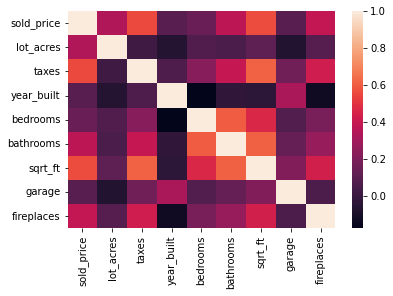

In [ ]:
corr = df2.corr()
sns.heatmap(corr)

## Statistics

In [ ]:
df2 = df[['sold_price', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces']]

In [ ]:
df2.var()

sold_price    1.016742e+11
lot_acres     2.672677e+03
taxes         1.263349e+07
year_built    3.126766e+02
bedrooms      1.140645e+00
bathrooms     1.555123e+00
sqrt_ft       1.107953e+06
garage        1.434472e+00
fireplaces    1.300164e+00
dtype: float64

In [ ]:
df2.skew()

sold_price     3.791446
lot_acres     31.424998
taxes          1.785330
year_built    -1.633609
bedrooms       7.202649
bathrooms      7.764916
sqrt_ft        2.077719
garage         4.904342
fireplaces     0.917299
dtype: float64

In [ ]:
df2.kurt()

sold_price      26.454092
lot_acres     1112.676538
taxes            6.379936
year_built       3.565899
bedrooms       180.124979
bathrooms      173.168435
sqrt_ft          9.279542
garage          83.053501
fireplaces       1.598456
dtype: float64